**Car Price Prediction Model**  by Nazarov Islom

This project focuses on estimating car prices in Belarus by examining various vehicle attributes, including brand, manufacturing year, engine specifications, fuel type, transmission, mileage, drive type, segment and color. Additionally, the goal is to identify which of these features have the greatest influence on a car’s price.

The dataset is taken from the Kaggle. The dataset contains of 56244 rows and 12 columns .

**Column Defenition**

| Column Name    | Description                                              |
|----------------|----------------------------------------------------------|
| make           | Car manufacturer company                                 |
| model          | Model of the car                                         |
| price USD      | Price of the car in USD                                  |
| year           | Year when the car was produced                           |
| condition      | The condition of the car (usually with mileage or not)   |
| mileage        | Car's mileage in kilometers                              |
| fuel type      | Type of fuel (electric, petrol, or diesel)               |
| volume (cm³)   | Car's engine volume in cubic centimeters                 |
| color          | Color of the car                                         |
| transmission   | Type of transmission                                     |
| drive unit     | Drive unit (e.g., FWD, RWD, AWD)                         |
| segment        | Segment of the car                                       |




In [408]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
#Loading the dataset
df = pd.read_csv('cars.csv')
#Displaying the first few rows of the dataset
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


**Data Preparation**


In [410]:
#Checking the size of the dataset
df.shape

(56244, 12)

In [411]:
#Checking data types of the columns
df.dtypes


make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [412]:
#Droping unnecessary columns
df.drop(columns=['model','segment'], inplace=True)

In [413]:
#Checking unique values of columns

df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [414]:
#Checking unique car makes
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

In [415]:
#Descriptive statistics of the dataset
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


**Relationship Analysis**

In this part i would do some visualizations and analysis to understand the relationships and patterns between columns

**Make Segment**

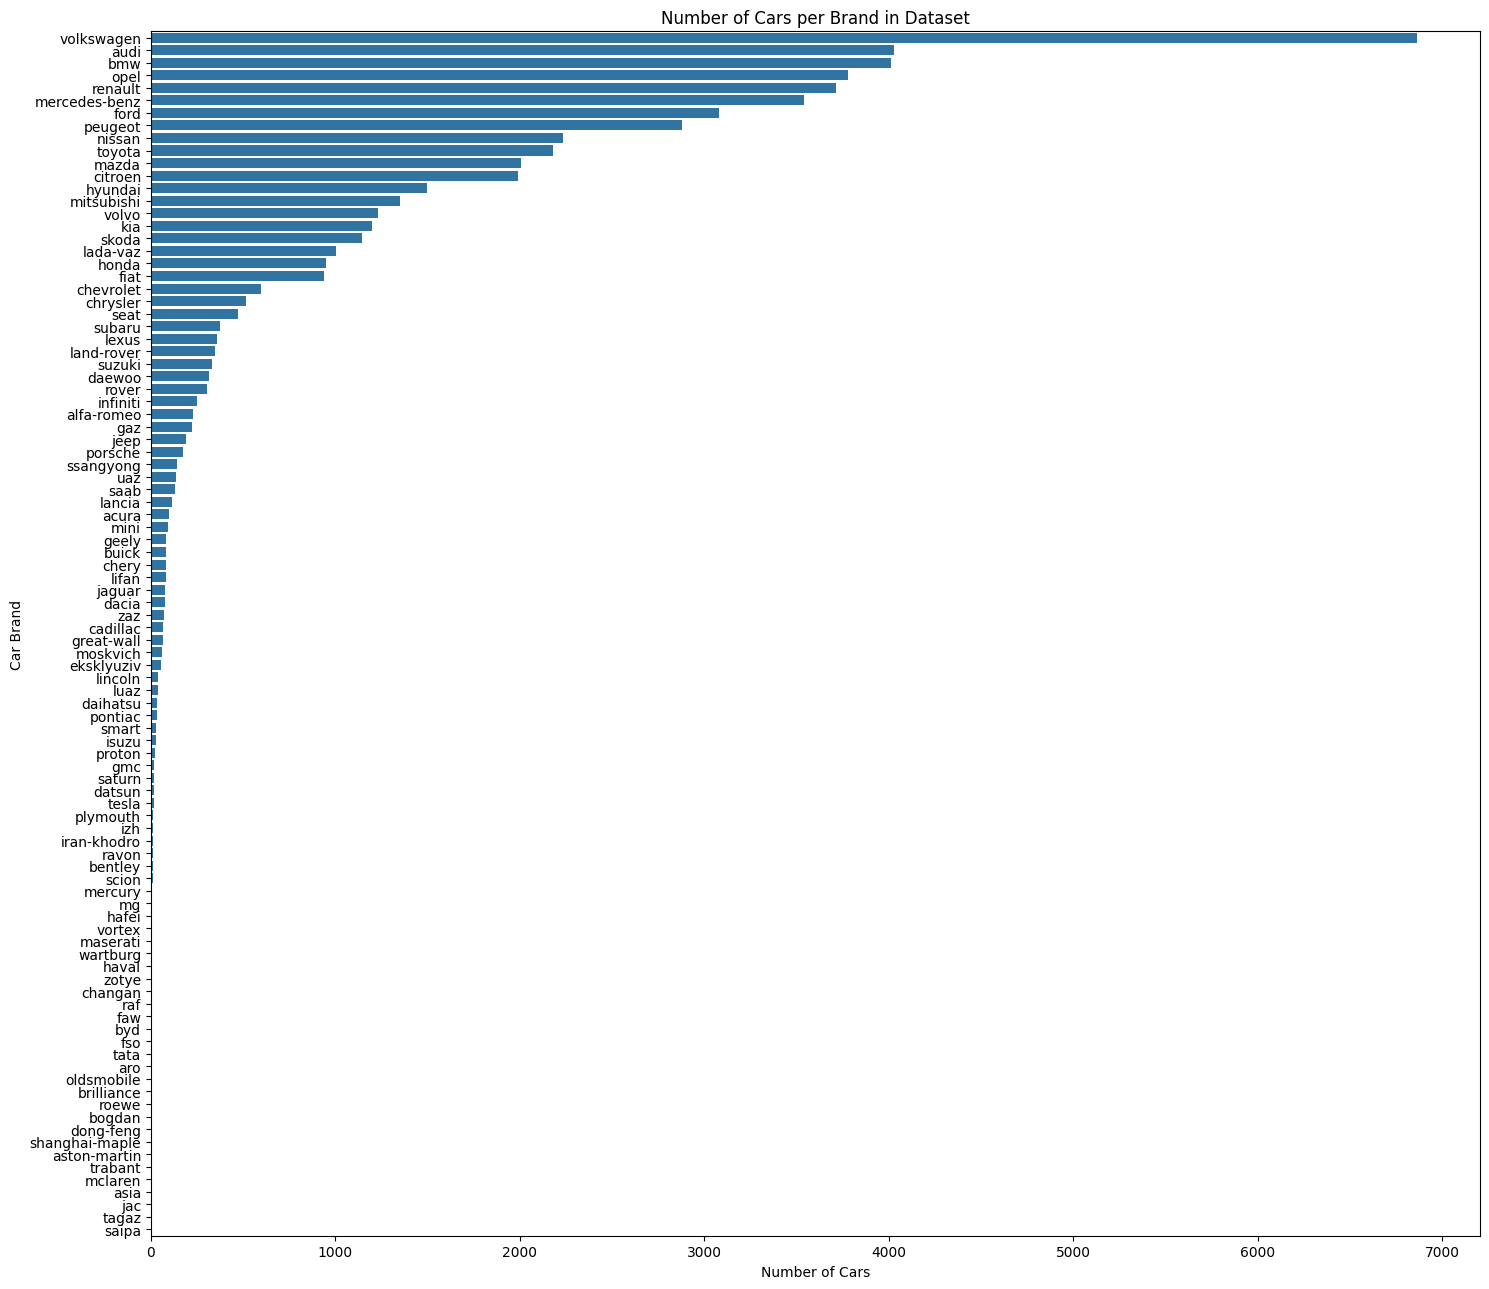

In [416]:
# Count brands
make_counts = df['make'].value_counts()

# Horizontal bar plot
plt.figure(figsize=(15, 13))  
sns.barplot(x=make_counts.values, y=make_counts.index)

plt.xlabel("Number of Cars")
plt.ylabel("Car Brand")
plt.title("Number of Cars per Brand in Dataset")
plt.tight_layout()
plt.show()

From the visual above it can be seen that Wolksvagen is the most popular popular car by far . After comes audi bmw and other car brands.

**Comparing Variables**

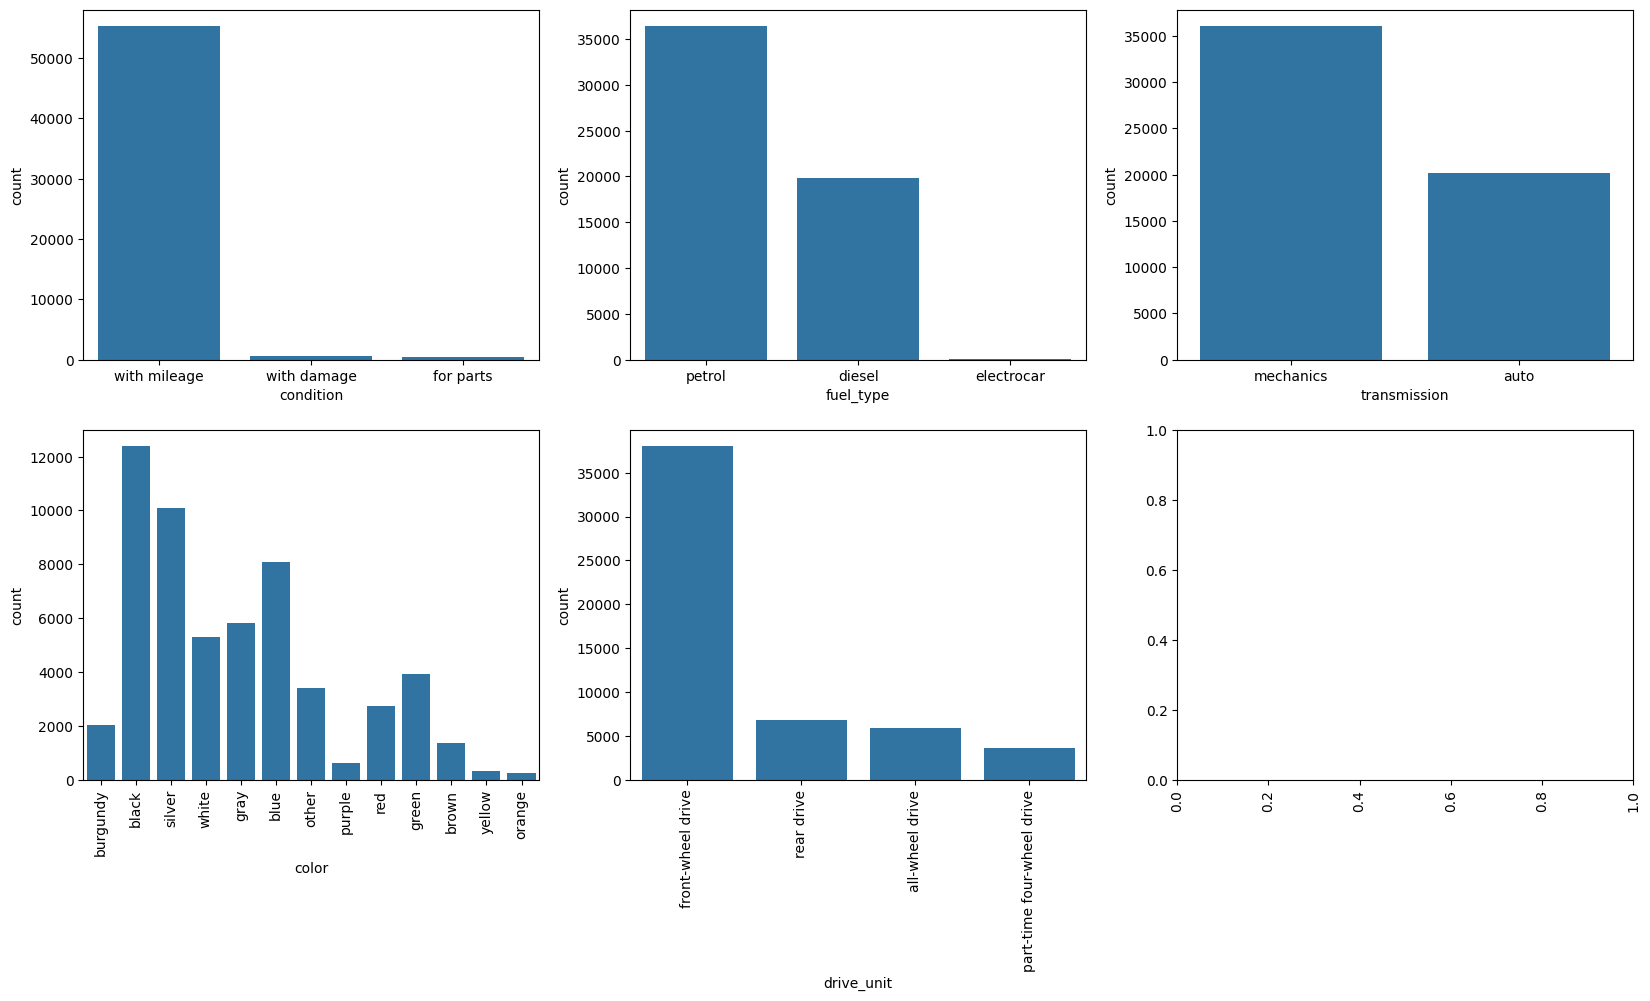

In [417]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
ax[1,2].tick_params(axis='x', rotation=90)

From the visuals above it can be seen that majority of cars are with mileage , small portion being damaged , or for parts . Every 2 car from 3 are pertol cars, and every 3rd car is diesel . Mainly cars are machanical , and most popular colors are black and silver . Also vast majority of cars are front-wheel-drive cars.

**Continuous Variable Distribution**


<Axes: xlabel='volume(cm3)', ylabel='Count'>

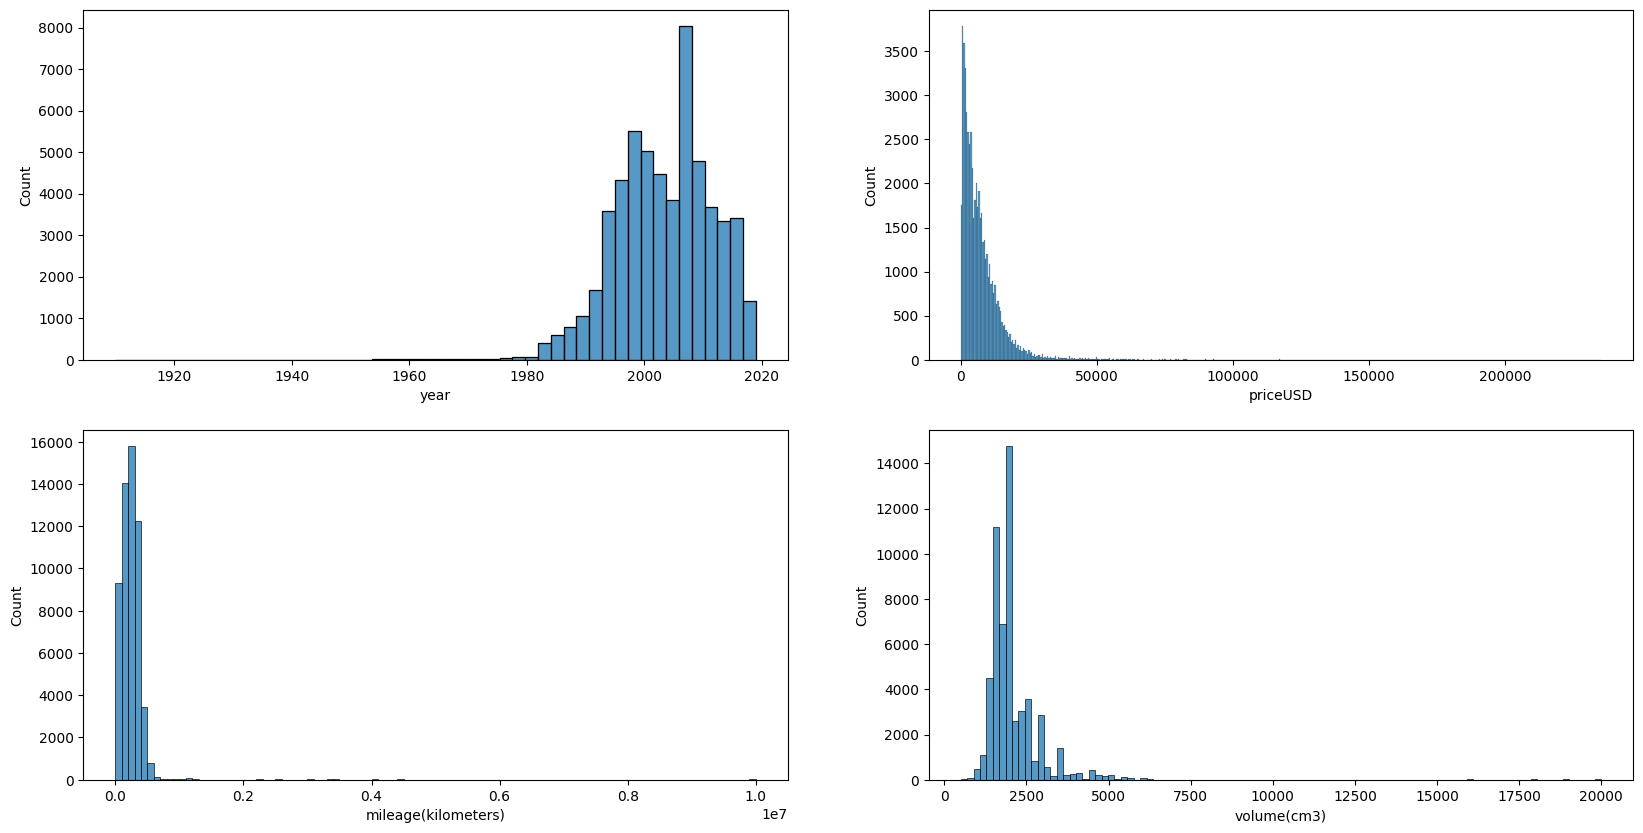

In [418]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100 )

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between 1750 to 2000 cm3.

As majority of cars are made after 1980 i will remove all the cars that were made before 1980

In [419]:
df= df[df['year']>1980]

**Price and Make analysis**

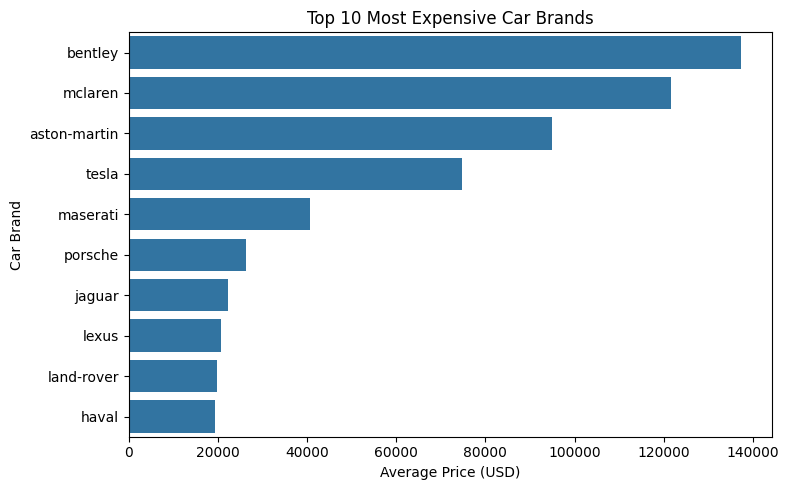

In [420]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.title('Top 10 Most Expensive Car Brands')
plt.xlabel('Average Price (USD)')
plt.ylabel('Car Brand')
plt.tight_layout()
plt.show()


This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

**Price and Condition**

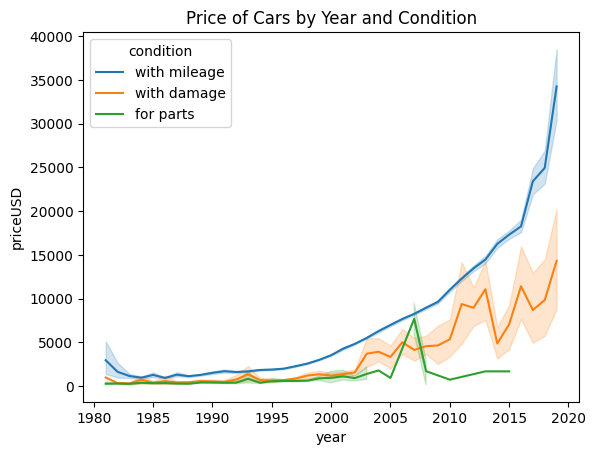

In [421]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

This graph shows the relationship between the price and the year of the car along with selling codition of the car. Cars, which are sold in working condition, are more expensive and their price increased with time, having exponential increase between 2015 to 2020. Cars, which were damaged, had a similar price to tha cars which were sold for parts between 1980 to 2000. However, the price of the damaged cars increased significanlty after 2000. Cars, which were sold for parts, tend to have minimal price and their price increased very little with time.

The cars running on petrol and diesel have similar mileage, however their prices are quite different. The cars running on petrol tend to have higher price than the diesel ones. The cars running on electricity tend to have very high prices and low mileage.

**Price and Transmition** 

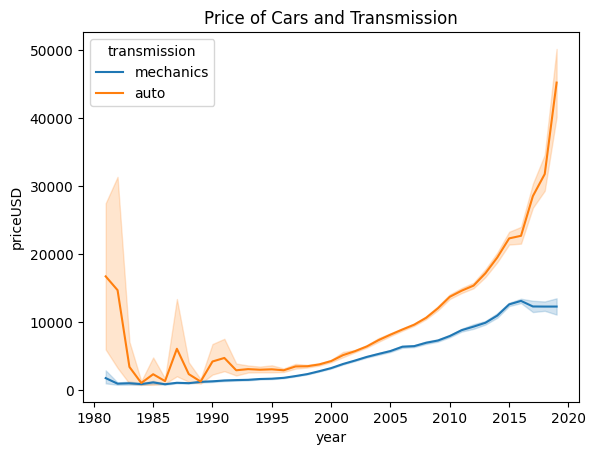

In [422]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of the cars with automatic transmission decreased significantly after 1983, however its price increased exponentially after 2000. However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

**Price and Fuel Type**

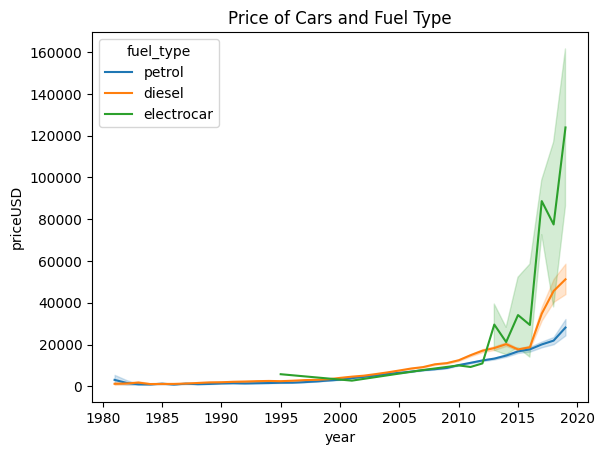

In [423]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

**Price and Drive Unit**

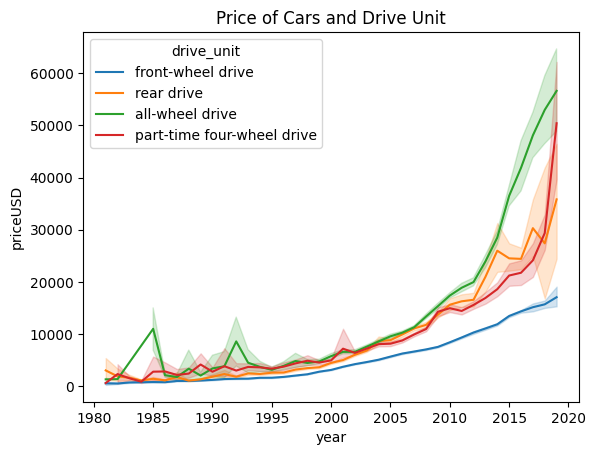

In [424]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Between 1980 to 1995, there was not much difference in the price of the cars based on the drive unit. However after 1995, the price of the cars with front wheel drive increased at a slower pace as compared to other drive units. The price of the cats with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part-time four wheel drive and rear wheel drive.

**Data Preparation 2**

In [425]:
# checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
dtype: int64

Since, the count of null values in small in comparison to that dataset size, I will be dropping the null values from the dataset for better accurasy.

In [426]:
df.dropna(inplace=True)


In [427]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make [52 56 70  2 28 72 87  1  5 61 63 16 91 59 89 25 71 73 66 50 92 44 39 68
  8  7 60 54 58 86 14 30 35 34 81 83 62 77 88 20 15 29 75 43 49 23 17 22
 65 26 82  6 24 12 48 64 32 78 57 42 79 55 13 47 38  4 45 31 46 18 41 10
 19 90 36 11 80 51 33  0 76 85 21 53 69 67 27 40  3 37 93 84 74  9]


**Outlier Removal**

In [428]:
from scipy import stats
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

z = np.abs(stats.zscore(df[cols]))
df = df[(z < 3).all(axis=1)]

**Train Test Split**

In [429]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

**Model Building**

Decision Tree Regression

In [430]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

Hypertuning with GridSearchCV

In [ ]:
#Checking the shape of the training data , to see how many combinations of features i can try with my PC
print(X_train.shape)

(42525, 9)


In [432]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4,5] ,
    'max_features': ['sqrt', 'log2', None, 0.5],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [433]:
print("Training Score:", best_model.score(X_train, y_train))


Training Score: 0.8734667289231268


In [434]:
#predicting the test set
# Predictions
y_pred = best_model.predict(X_test)

**Model Evaluation**

In [435]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8254508359286575
Mean Squared Error: 10907870.894558774
Mean Absolute Error: 1633.3375347992696
Root Mean Squared Error: 3302.7066013436274


**Feature Importance**

In [436]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
1,year,0.673836
5,volume(cm3),0.242719
3,mileage(kilometers),0.025736
8,drive_unit,0.020345
0,make,0.015861
4,fuel_type,0.011259
7,transmission,0.007475
6,color,0.002715
2,condition,0.000054


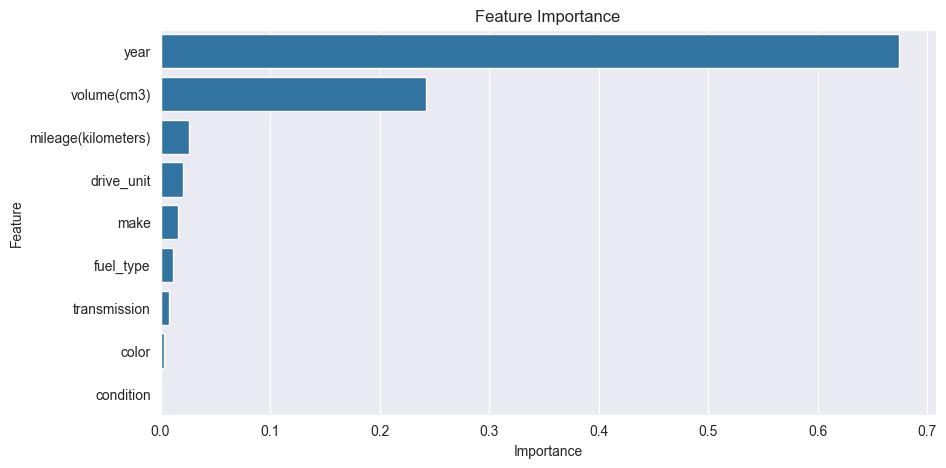

In [438]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

**Conclusion**

This project aimed to predict car prices based on various features such as brand, year, engine size, fuel type, transmission, mileage, drive unit, color, and vehicle segment. During exploratory data analysis, it was observed that car prices in this dataset have risen significantly after the year 2000. Petrol-powered cars with automatic transmissions were generally priced higher than diesel cars with manual transmissions. Electric vehicles stood out as the most expensive among all fuel types. Cars with all-wheel drive systems had the highest prices across drive units.

A Decision Tree Regressor model was used for the prediction task and achieved an accuracy of 82.54%. The most influential factors in determining car price were the year of manufacture and engine volume.